# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [3]:
# Matriz de transformação
T = np.array([[0.5, 0.5], [1, -1]])

# Empilhando os dados de p1 e p2 em uma matriz 2xN
dados = np.vstack([df['p1'], df['p2']])

# Aplicando a transformação linear
transformados = T @ dados

# Colocando no DataFrame
df['media'] = transformados[0]
df['diferenca'] = transformados[1]

df.head()

,p1,p2,media,diferenca
0,6.964692,7.943428,7.454060,-0.978736
1,2.861393,5.099537,3.980465,-2.238143
2,2.268515,0.974429,1.621472,1.294085
3,5.513148,4.474359,4.993754,1.038788
4,7.194690,8.938402,8.066546,-1.743712


In [4]:
correlacao_p1_p2 = df[['p1', 'p2']].corr().iloc[0,1]
print(f"Correlação entre p1 e p2: {correlacao_p1_p2:.4f}")

Correlação entre p1 e p2: 0.8957


In [5]:
correlacao_media_diferenca = df[['media', 'diferenca']].corr().iloc[0,1]
print(f"Correlação entre média e diferença: {correlacao_media_diferenca:.4f}")

Correlação entre média e diferença: -0.1335


A correlação entre as notas originais p1 e p2 é alta e positiva, pois p2 foi gerada a partir de p1. Isso mostra que os dados estão fortemente correlacionados.

Após a transformação linear, a correlação entre média e diferença cai para próximo de zero.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [6]:
# Matriz de transformação para soma e diferença
T_soma_dif = np.array([[1, 1], [1, -1]])

# Dados empilhados
dados = np.vstack([df['p1'], df['p2']])

# Aplicação da transformação
transformados_sd = T_soma_dif @ dados

# Adicionando ao DataFrame
df['soma'] = transformados_sd[0]
df['diferenca_2'] = transformados_sd[1]


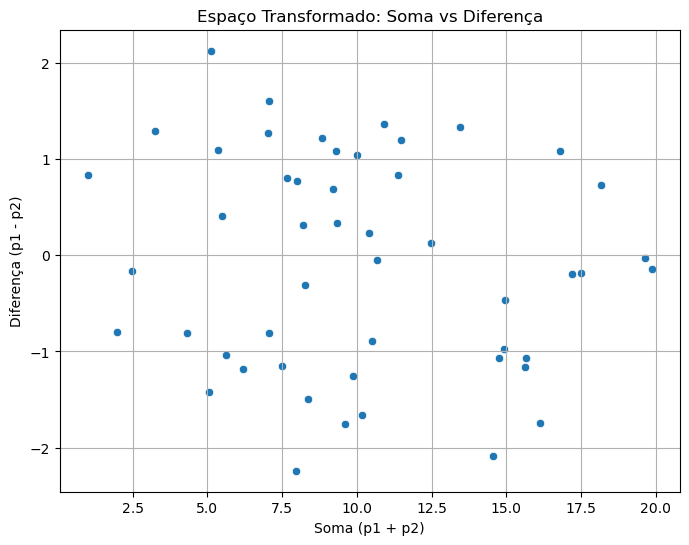

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='soma', y='diferenca_2', data=df)
plt.title('Espaço Transformado: Soma vs Diferença')
plt.xlabel('Soma (p1 + p2)')
plt.ylabel('Diferença (p1 - p2)')
plt.grid(True)
plt.show()
